In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [14]:
#max date
max_date = session.query(func.max(func.strftime("%Y-%m-%d", Measurement.date))).limit(1).all()
max_date[0][0]

'2017-08-23'

In [52]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from the last data point in the database
# Perform a query to retrieve the data and precipitation scores
precip_data = session.query(func.strftime("%Y-%m-%d", Measurement.date), Measurement.prcp).\
    filter(func.strftime("%Y-%m-%d", Measurement.date) >= dt.date(2016, 8, 23)).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
precipitation_df = pd.DataFrame(precip_data, columns = ['date', 'precipitation'])
precipitation_df.set_index('date', inplace = True)
# Sort the dataframe by date
precipitation_df.sort_values(by='date',ascending= True) 
precipitation_df = precipitation_df.sort_values(by='date')
precipitation_df.head()

,precipitation
date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15


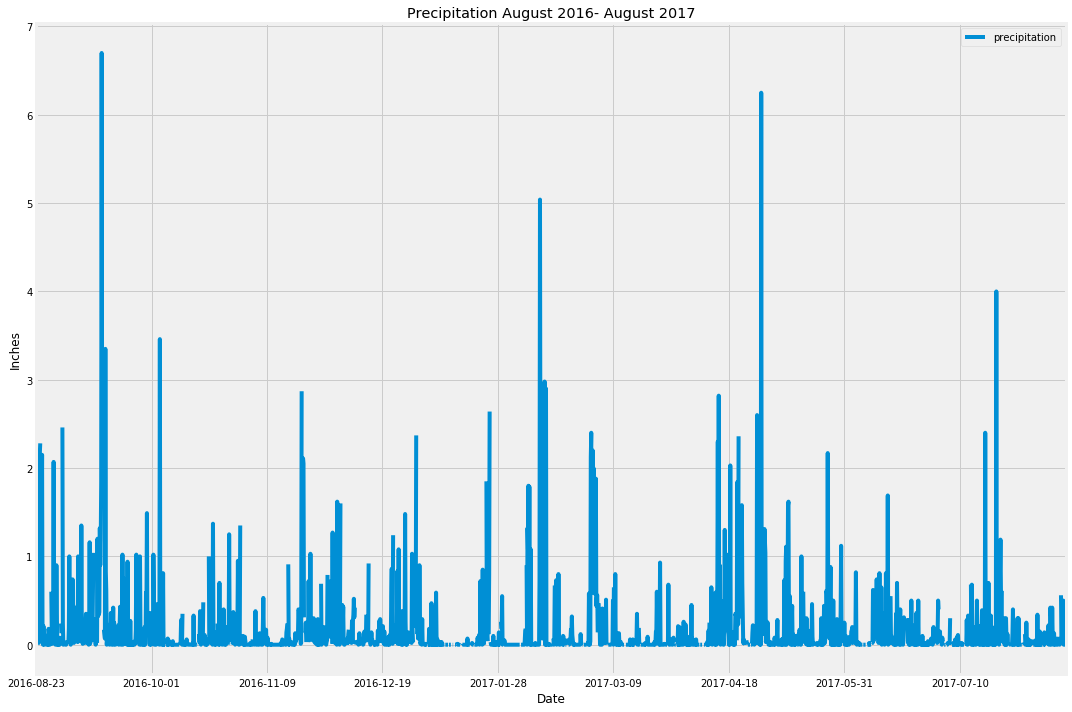

In [53]:
# Use Pandas Plotting with Matplotlib to plot the data
fig, ax = plt.subplots(figsize = (15, 10))
precipitation_df.plot(ax = ax, x_compat = True)
#Labels and Titles
ax.set_xlabel('Date')
ax.set_ylabel('Inches')
ax.set_title("Precipitation August 2016- August 2017")
#plot
plt.tight_layout()
plt.show()

In [28]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipitation_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [54]:
# Design a query to show how many stations are available in this dataset?
stations = session.query(Station.id).distinct().count()
stations

9

In [55]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
station_counts = (session.query(Measurement.station, func.count(Measurement.station))
                        .group_by(Measurement.station)
                        .order_by(func.count(Measurement.station).desc())
                        .all())
station_counts

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [56]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
most_active_station = 'USC00519281'
temp = session.query(func.max(Measurement.tobs), func.min(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == most_active_station).all()
temp


[(85.0, 54.0, 71.66378066378067)]

In [57]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_observation = session.query(Measurement.date, Measurement.tobs).filter(Measurement.station == most_active_station).\
    filter(func.strftime("%Y-%m-%d", Measurement.date) >= dt.date(2016, 8, 23)).all()
temp_observation_df = pd.DataFrame(temp_observation, columns = ['date', 'temperature'])
temp_observation_df

,date,temperature
0,2016-08-23,77.0
1,2016-08-24,77.0
2,2016-08-25,80.0
3,2016-08-26,80.0
4,2016-08-27,75.0
...,...,...
347,2017-08-14,77.0
348,2017-08-15,77.0
349,2017-08-16,76.0
350,2017-08-17,76.0


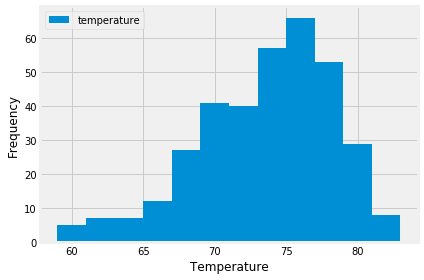

In [58]:
#Histogram
fig, ax = plt.subplots()
temp_observation_df.plot.hist(bins = 12, ax = ax)

#labels
ax.set_xlabel('Temperature')
ax.set_ylabel('Frequency')

#plot
plt.tight_layout()
plt.show()

## Bonus Challenge Assignment

In [59]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [64]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.

my_trip_temp=calc_temps('2016-08-01','2016-08-09')
print(f"The Lowest Temperature: {my_trip_temp[0][0]} F°")
print(f"The Average Temperature: {round(my_trip_temp[0][1], 2)} F°")
print(f"The Highest Temperature: {my_trip_temp[0][2]} F°")

The Lowest Temperature: 72.0 F°
The Average Temperature: 78.12 F°
The Highest Temperature: 83.0 F°


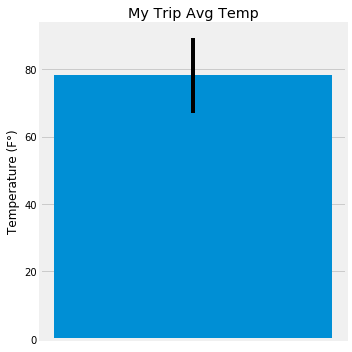

In [79]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

peak_to_peak=my_trip_temp[0][2]-my_trip_temp[0][0]
average_temp=my_trip_temp[0][1]

#Barchart
fig, ax = plt.subplots(figsize = (5, 5))

ax.bar(1, average_temp, yerr = peak_to_peak, width = 0.1)

#Labels
ax.set_xticks([0])
ax.set_xticklabels([""])
ax.set_title('My Trip Avg Temp')
ax.set_ylabel('Temperature (F°)')

#plot
plt.tight_layout()
plt.show()

In [98]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
last_year_rainfall = session.query(Station.station, func.avg(Measurement.prcp),Station.name, Station.latitude, Station.longitude,
                               Station.elevation, ).\
    filter(Measurement.station == Station.station).\
    filter(func.strftime("%Y-%m-%d", Measurement.date) >= dt.date(2015, 8, 1)).group_by(Station.station).\
    order_by(func.avg(Measurement.prcp).desc()).all()

last_year_rainfall
#dataframe
last_year_rainfall_df = pd.DataFrame(last_year_rainfall, columns = ['Station','Avg. Precipitation (in.)', 'Name', 'Latitude', 'Longitude', 
                                                                    'Elevation'])

last_year_rainfall_df

,Station,Avg. Precipitation (in.),Name,Latitude,Longitude,Elevation
0,USC00516128,0.504539,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4
1,USC00519281,0.245156,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
2,USC00513117,0.171021,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
3,USC00519523,0.150171,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
4,USC00514830,0.136265,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
5,USC00511918,0.125758,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
6,USC00517948,0.092000,"PEARL CITY, HI US",21.39340,-157.97510,11.9
7,USC00519397,0.054013,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
8,USC00518838,0.000000,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6


In [99]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [100]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`
# Set the start and end date of the trip
# Use the start and end date to create a range of dates
# Stip off the year and save a list of %m-%d strings
# Loop through the list of %m-%d strings and calculate the normals for each date
my_trip_days=["08-01","08-02","08-03","08-04","08-05","08-06","08-07","08-08","08-09"]


In [113]:
normals=[]
#Loop through the list of %m-%d strings and calculate the normals for each date
for trip_day in my_trip_days:
    day = {}
    day['Day'] = f"2016-{trip_day}"
    daily_n = daily_normals(trip_day)
    day['Max'] = daily_n[0][2]
    day['Min'] = daily_n[0][0]
    day['Avg'] = daily_n[0][1]
    normals.append(day)
normals



[{'Day': '2016-08-01', 'Max': 83.0, 'Min': 67.0, 'Avg': 75.54},
 {'Day': '2016-08-02', 'Max': 84.0, 'Min': 68.0, 'Avg': 75.60377358490567},
 {'Day': '2016-08-03', 'Max': 85.0, 'Min': 70.0, 'Avg': 76.61111111111111},
 {'Day': '2016-08-04', 'Max': 84.0, 'Min': 69.0, 'Avg': 76.71153846153847},
 {'Day': '2016-08-05', 'Max': 82.0, 'Min': 69.0, 'Avg': 76.14814814814815},
 {'Day': '2016-08-06', 'Max': 83.0, 'Min': 67.0, 'Avg': 76.25},
 {'Day': '2016-08-07', 'Max': 83.0, 'Min': 71.0, 'Avg': 77.15686274509804},
 {'Day': '2016-08-08', 'Max': 83.0, 'Min': 68.0, 'Avg': 76.5576923076923},
 {'Day': '2016-08-09', 'Max': 81.0, 'Min': 69.0, 'Avg': 75.98039215686275}]

In [114]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
normals_df=pd.DataFrame(normals)
normals_df.set_index('Day',inplace=True)
normals_df

,Max,Min,Avg
Day,,,
2016-08-01,83.0,67.0,75.540000
2016-08-02,84.0,68.0,75.603774
2016-08-03,85.0,70.0,76.611111
2016-08-04,84.0,69.0,76.711538
2016-08-05,82.0,69.0,76.148148
2016-08-06,83.0,67.0,76.250000
2016-08-07,83.0,71.0,77.156863
2016-08-08,83.0,68.0,76.557692
2016-08-09,81.0,69.0,75.980392


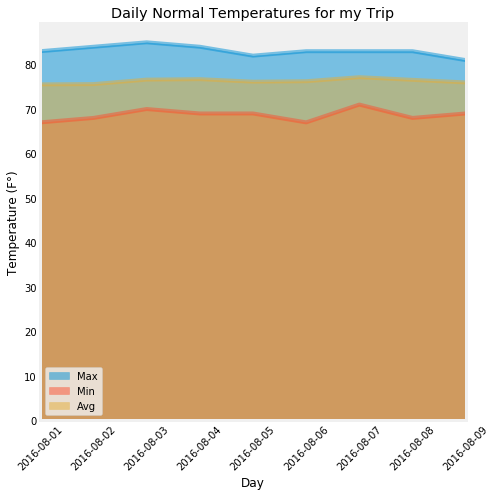

In [122]:
# Plot the daily normals as an area plot with `stacked=False`
fig, ax = plt.subplots(figsize = (7,7))
normals_df.plot.area(ax = ax, stacked = False)

#labels
ax.set_xlabel('Day')
ax.set_ylabel('Temperature (F°)')
ax.set_title('Daily Normal Temperatures for my Trip')

#ticks
dates = [f"2016-{trip_day}" for trip_day in my_trip_days]
ax.set_xticks(np.arange(len(dates)))
ax.set_xticklabels(dates, rotation = 45)

#plot
plt.grid()
plt.tight_layout()
plt.show()